In [18]:
import numpy as np
import scipy.optimize as fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd 

In [19]:
file = pd.read_csv("60degelizabeth1.csv")
tx, aydata, Fdata= np.loadtxt("60degelizabeth1.csv", delimiter=",", skiprows=1, usecols=(0,2,4), unpack=True)

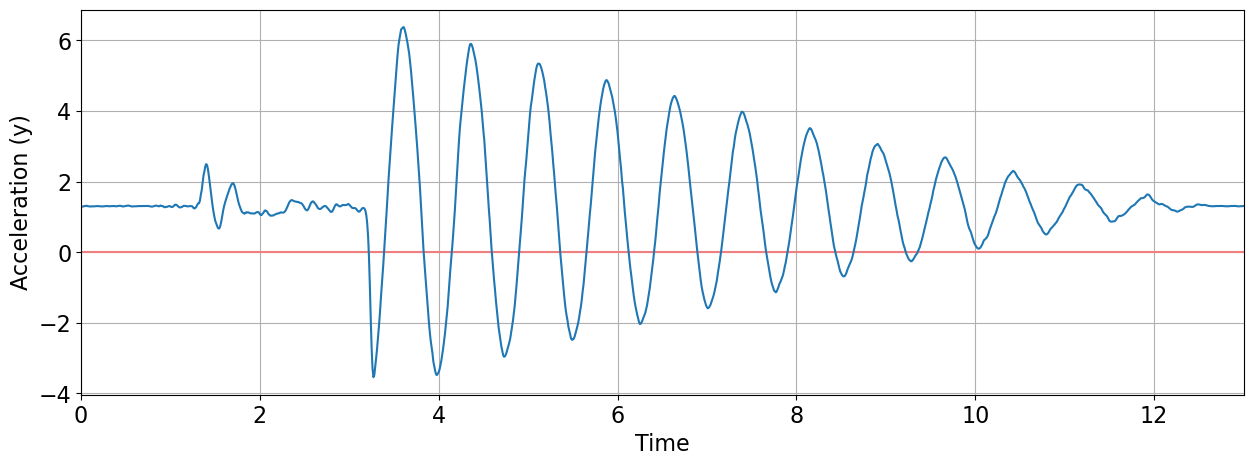

In [20]:
plt.figure(figsize=(15, 5))
plt.axhline(y=-0, color="lightcoral")
plt.plot(file["Time (s)"], file["Ay (m/s²)"]+9.81)
plt.xlim(0, 13)
plt.xlabel("Time")
plt.ylabel("Acceleration (y)")
plt.grid()
plt.show()

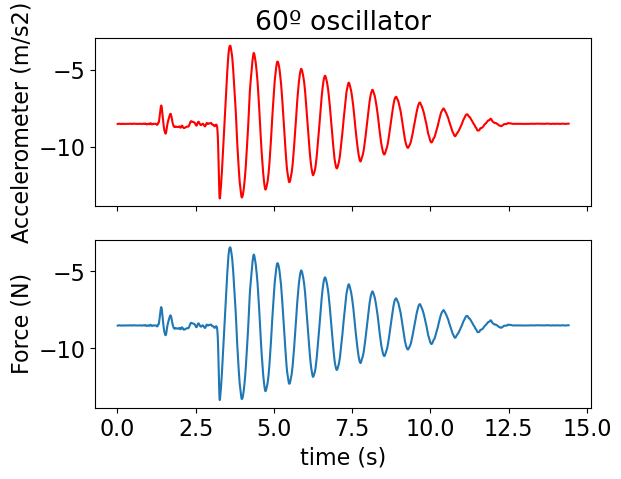

In [21]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(tx, aydata,'r', label="accelerometer")
axs[0].set_title('60º oscillator')
axs[0].set_ylabel('Accelerometer (m/s2)')
axs[1].plot(tx, aydata)
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('Force (N)')
plt.show()

In [22]:
# data interpolation
yinterp = interp1d(tx, aydata, kind="linear")

start_time = 4
stop_time = 11
step_size = 0.005
tvals = np.arange(start_time, stop_time, step_size)  
yvals = yinterp(tvals)

In [23]:
# simple harmonic motion model
# acceleration 
def simple_a(t, A, B, w, phi):                  
    return B - A * (w ** 2) * np.cos(w * t + phi)

# position
def simple_y(t, A, B, w, phi):
    return B + A * np.cos(w * t + phi)

# inital values 
Ainit, Binit, winit, phiinit, betainit = (0.1, -10, 8, 1, 0)
start_params = (Ainit, Binit, winit, phiinit)

array([[ 3.76126599e-02,  4.61600908e-04],
       [-8.46808473e+00,  2.23423802e-02],
       [ 8.29856187e+00,  6.03166843e-03],
       [ 4.05569697e-02,  2.43685637e-02]])

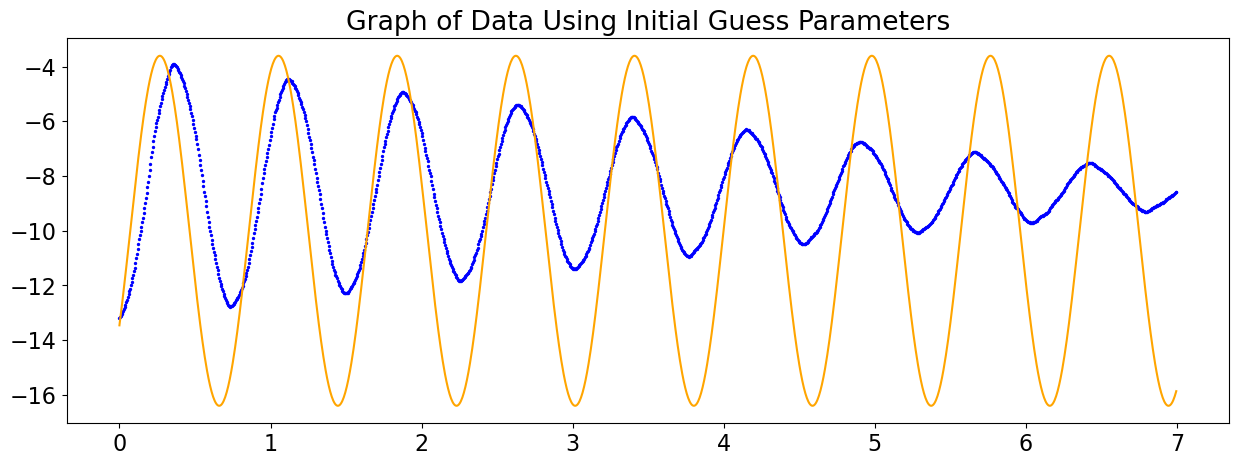

In [24]:
# fitting initial guesses
params, cov = fit.curve_fit(simple_a, tvals-start_time, yvals, p0=start_params)
(A, B, w, phi) = params

std_errs = np.sqrt(np.diag(cov))
display(np.transpose([params, std_errs]))

ypred = simple_a(tvals-start_time, A, B, w, phi)

# graph
plt.figure(figsize=(15,5))
plt.plot(tvals-start_time, simple_a(tvals-start_time, Ainit, Binit, winit, phiinit), color='orange')
plt.scatter(tvals-start_time, yvals, c="b", s=2)
plt.title("Graph of Data Using Initial Guess Parameters")
plt.show()

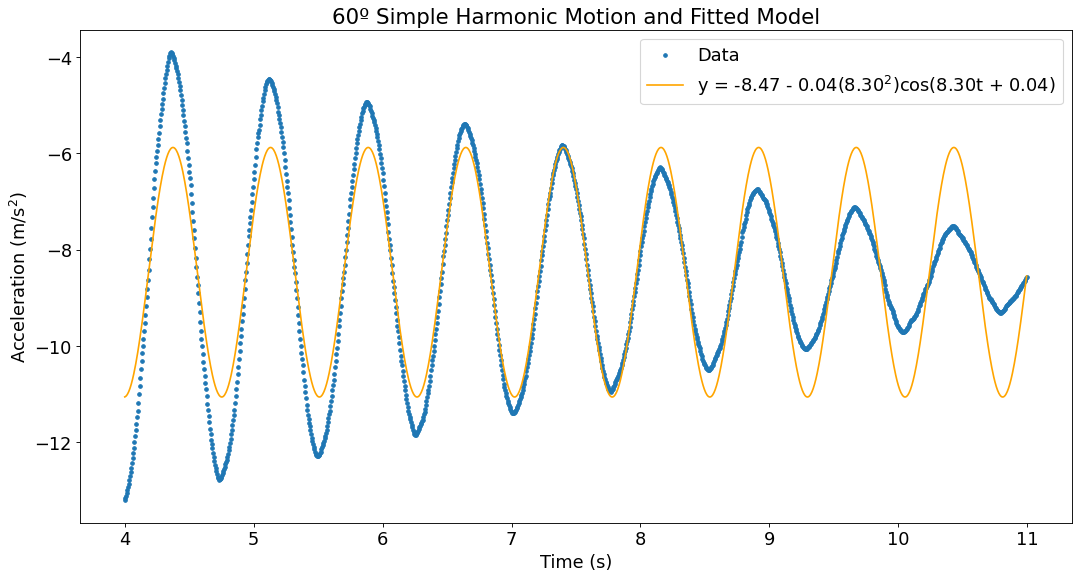

A = 0.04 
B = -8.47 
w = 8.30 
phi = 0.04


In [25]:
# best fit plot simple harmonic motion
fig1 = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.scatter(tvals, yvals, s=10, label="Data")
plt.plot(tvals, ypred, color='orange', label=f"y = {B:.2f} - {A:.2f}({w:.2f}$^2$)cos({w:.2f}t + {phi:.2f})")

plt.title("60º Simple Harmonic Motion and Fitted Model")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s$^2$)")
plt.legend(loc="upper right")
plt.show()

print(f"A = {A:.2f} \nB = {B:.2f} \nw = {w:.2f} \nphi = {phi:.2f}")

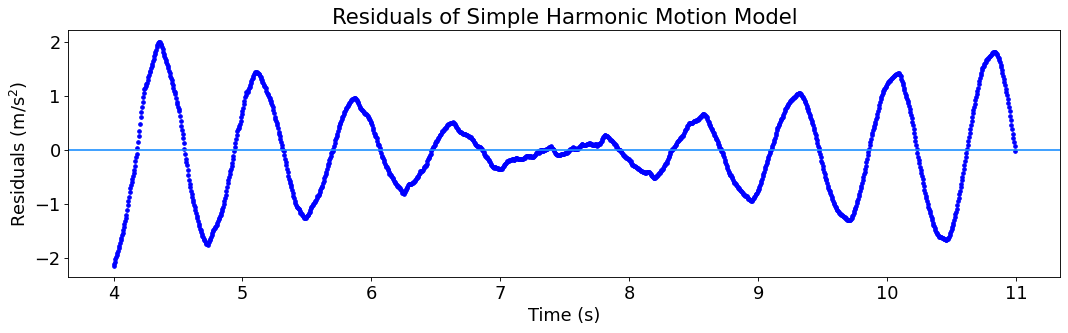

In [26]:
# redisuals 
residuals = yvals - ypred
fig2b = plt.figure(figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({"font.size": 16})

plt.axhline(0, color="dodgerblue")
plt.scatter(tvals, residuals, color='blue', s=10)

plt.title("Residuals of Simple Harmonic Motion Model")
plt.xlabel("Time (s)")
plt.ylabel("Residuals (m/s$^2$)")
plt.show()

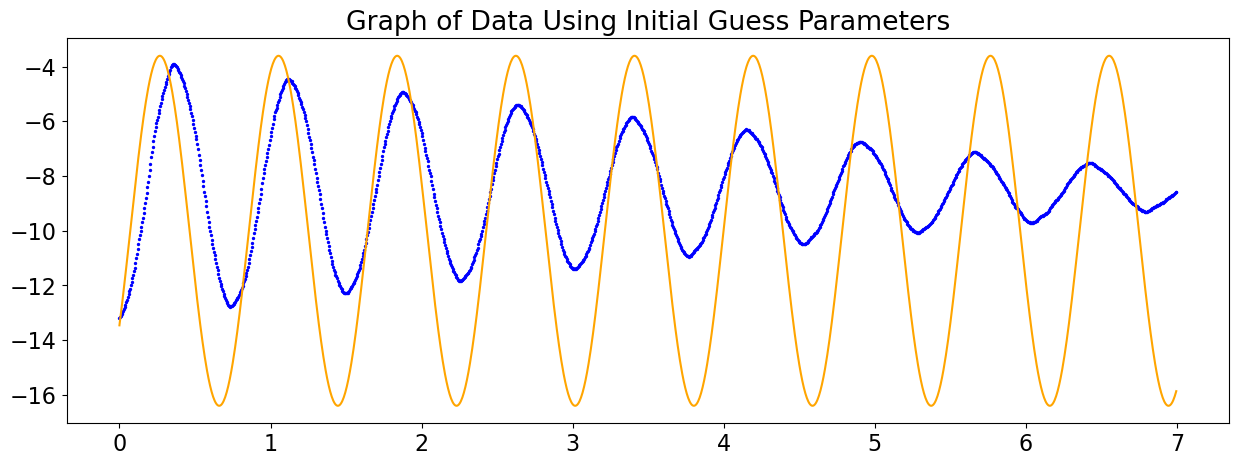

In [27]:
# damped harmonic motion model
# acceleration 
def vdamped_a(t, A, B, w, phi, beta):
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))

# plot
plt.figure(figsize=(15,5))
plt.plot(tvals-start_time, vdamped_a(tvals-start_time, Ainit, Binit, winit, phiinit, betainit), color='orange')
plt.scatter(tvals-start_time, yvals, c="b", s=2)
plt.title("Graph of Data Using Initial Guess Parameters")
plt.show()


In [28]:
# curve fit
start_params = (Ainit, Binit, winit, phiinit, betainit)
params, cov = fit.curve_fit(vdamped_a, tvals-start_time, yvals, p0=start_params)
[A, B, w, phi, beta] = params

std_errs = np.sqrt(np.diag(cov))
print(np.transpose([params, std_errs]))

ypred = vdamped_a(tvals-start_time, A, B, w, phi, beta) 

[[ 7.40554094e-02  2.26164198e-04]
 [-8.49620773e+00  3.92668183e-03]
 [ 8.28223750e+00  1.18825864e-03]
 [ 3.27614207e-02  3.01551538e-03]
 [ 2.18082566e-01  1.18658978e-03]]


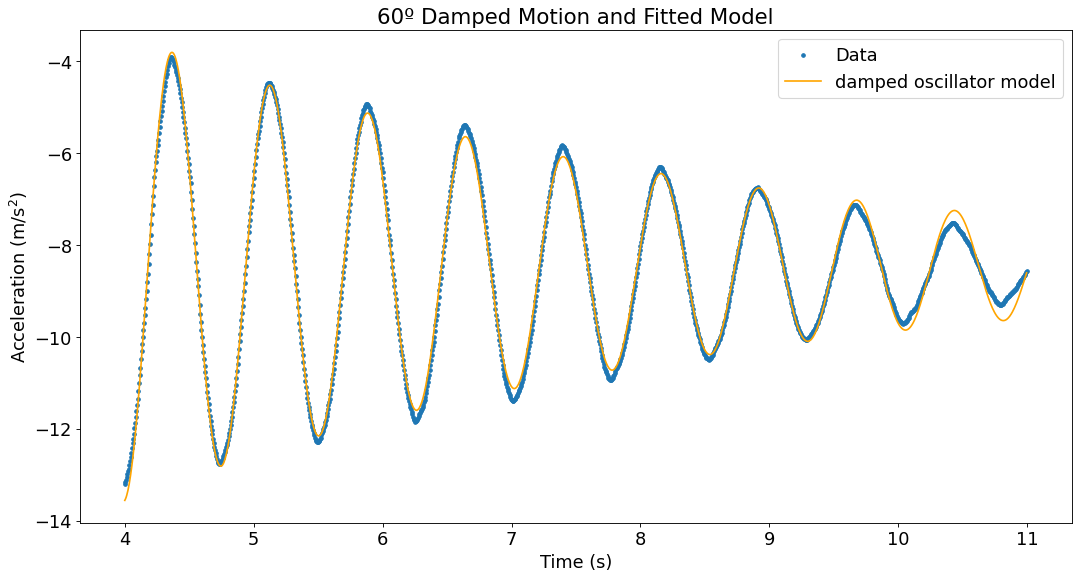

A = 0.07 
B = -8.50 
w = 8.28 
phi = 0.03 
beta = 0.22


In [29]:
fig1 = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.scatter(tvals, yvals, s=10, label="Data")
plt.plot(tvals, ypred, color='orange', label="damped oscillator model")

plt.title("60º Damped Motion and Fitted Model")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s$^2$)")
plt.legend(loc="upper right")
plt.show()

print(f"A = {A:.2f} \nB = {B:.2f} \nw = {w:.2f} \nphi = {phi:.2f} \nbeta = {beta:.2f}")

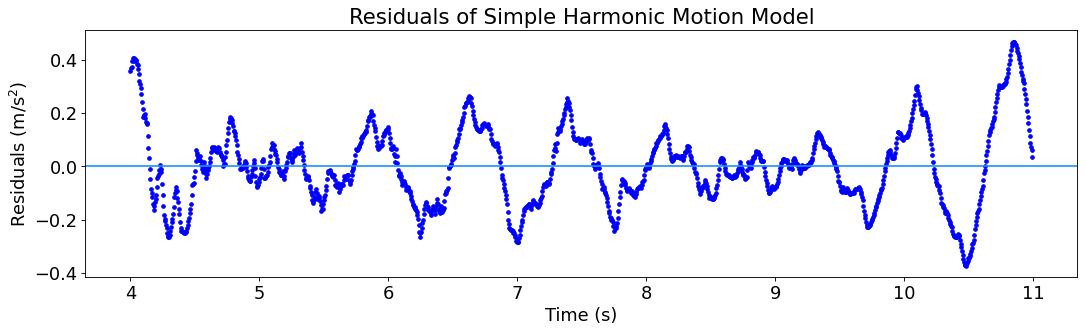

In [30]:
# redisuals 
residuals = yvals - ypred
fig2b = plt.figure(figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({"font.size": 16})

plt.axhline(0, color="dodgerblue")
plt.scatter(tvals, residuals, color='blue', s=10)

plt.title("Residuals of Simple Harmonic Motion Model")
plt.xlabel("Time (s)")
plt.ylabel("Residuals (m/s$^2$)")
plt.show()